In [62]:
# Importing the libraries used.
%matplotlib inline
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy.stats import lognorm, binom
import numpy as np

In [2]:
# Testing several values of sigma to make sure they match the z-table.
print(norm.cdf(0))
print(norm.cdf(1))
print(norm.cdf(2))
print(norm.cdf(5))
print(norm.cdf(-1))

0.5
0.8413447460685429
0.9772498680518208
0.9999997133484281
0.15865525393145707


In [3]:
# Doing the inverse, getting a sigma for given probability value.
print(norm.ppf(.25))
print(norm.ppf(0.5))
print(norm.ppf(.8413447460685429))
print(norm.ppf(.9772498680518208))
print(norm.ppf(0.9999997133484281))
print(norm.ppf(0.15865525))

-0.6744897501960817
0.0
1.0
2.0000000000000004
4.999999999970176
-1.0000000162476559


In the two cells above, we called and used the scipy stats library in order to integrate the standard normal distribution. We do this by calling `stats.norm.cdf()` and also found the inverses by using `stats.norm.ppf()`.
Some things to note here are that the `stats.norm.cdf()` and `stats.norm.ppf()` are inverses of each other and therefore norm.ppf(norm.cdf(**x**)) = **x**. Further, the `norm.cdf()` function results in a probability ranging from 0 to 1, from a given value of standard deviation or $\sigma$. The `norm.ppf()` function is giving the value needed to reach a certain probability by integrating from -$\infty$ to that $\sigma$ value. The negative number corresponds to integrating from -$\infty$ to a point $\mid{x}\mid$ that is left of the origin on our normal distribution.

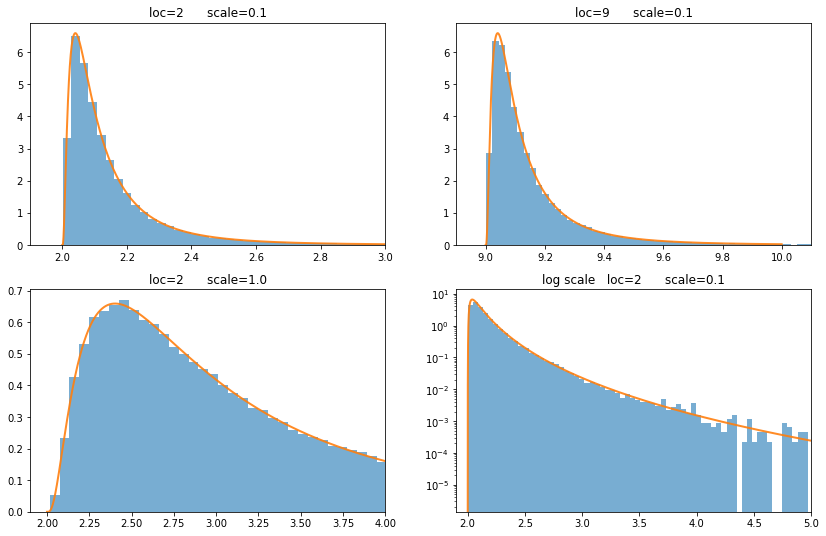

In [4]:
fig, ax = plt.subplots(2,2)
fig.set_size_inches(14,9)
plt.cla()


s = 0.954 # s value from the documentation expamples.
x = np.linspace(2, 9, 10000)
r = lognorm.rvs(s,loc=2,scale=0.1, size=10**5)

ax[0,0].plot(x, lognorm.pdf(x,s, loc=2,scale=0.1),'tab:orange','-', lw=2, alpha=.9)
ax[0,0].hist(r, density=True, bins=250, alpha=0.6,color='tab:blue')
ax[0,0].set_xlim(1.9,3.0)
ax[0,0].set_yscale('linear')
ax[0,0].set_title('loc=2      scale=0.1')

x1 = np.linspace(9, 10, 10000)
r1 = lognorm.rvs(s,loc=9,scale=0.1, size=10**5)

ax[0,1].plot(x1, lognorm.pdf(x1,s, loc=9,scale=0.1),'tab:orange','-', lw=2, alpha=.9)
ax[0,1].hist(r1, density=True, bins=250, alpha=0.6,color='tab:blue')
ax[0,1].set_xlim(8.9,10.1)
ax[0,1].set_yscale('linear')
ax[0,1].set_title('loc=9      scale=0.1')

x2 = np.linspace(2, 7, 10000)
r2 = lognorm.rvs(s,loc=2,scale=1, size=10**5)

ax[1,0].plot(x2, lognorm.pdf(x2,s, loc=2,scale=1.0),'tab:orange','-', lw=2, alpha=.9)
ax[1,0].hist(r2, density=True, bins=1150, alpha=0.6,color='tab:blue')
ax[1,0].set_xlim(1.9,4)
ax[1,0].set_yscale('linear')
ax[1,0].set_title('loc=2      scale=1.0')

ax[1,1].plot(x, lognorm.pdf(x,s, loc=2,scale=0.1),'tab:orange','-', lw=2, alpha=.9)
ax[1,1].hist(r, density=True, bins=150, alpha=0.6,color='tab:blue')
ax[1,1].set_xlim(1.9,5)
ax[1,1].set_yscale('log')
ax[1,1].set_title('log scale   loc=2      scale=0.1')


plt.show()

In the plots above, we see how the distribution matches the samples well, and how varying the `loc` parameter changes the location of the distribution. On the other hand, altering the `scale` parameter changes the width of the distribution and we see the peak reduced by 1/10.

Imagining that our signal-free data follows the lognorm distribution with `loc = 0` and `scale = 1`, and the data is normalized, we take a measurement from this data. This value is 4 for the intent of this section. A statistical question we may want to ask is as follows: "What is the probability that the *background* gives me a data point that looks as or more signal-like than the data point I have? And for this probability, how many $\sigma$ away from the mean would the probability correspond to on a Gaussian distribution?". <br>

To convert this question into a mathematical integral we deduce the following: $$\int_{4}^{\infty}L(x) = 1 - \int_{-\infty}^{4}L(x).$$
Which results in our desired probability (P). To translate this into code we simply do `1 - lognorm.cdf(4)`.


In [46]:
s = 0.954
print(1 - lognorm.cdf(s,4))

0.5046965998316701


In [49]:
print(lognorm.ppf(s,lognorm.cdf(s,4)))

2.3037929916182076


We convert our probability value and get a sigma of 2.3.

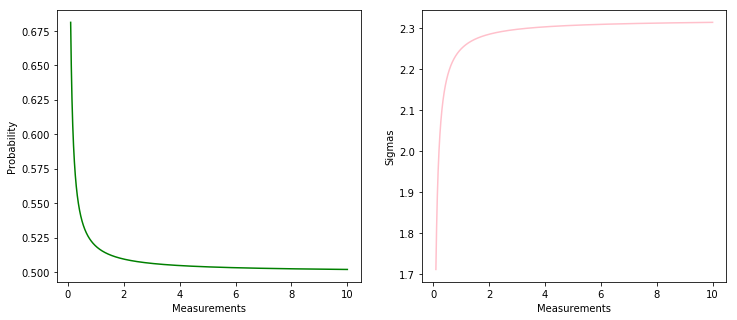

In [56]:
x = np.linspace(0.1,10,10000) #lognorm needs x>0 and s>0
fig, ax = plt.subplots(1,2)
fig.set_size_inches(12,5)

#plot cdf
ax[0].plot(x, lognorm.sf(s,x), color='green') #lognorm.sf here is equal to 1 - cdf. sf is survivor function.
ax[0].set_xlabel('Measurements')
ax[0].set_ylabel('Probability')

#plot the sigma values
ax[1].plot(x,lognorm.ppf(s,lognorm.cdf(s,x)), color='pink')
ax[1].set_xlabel('Measurements')
ax[1].set_ylabel('Sigmas')

plt.show()

The pattern we notice here is that as our measurement value moves towards our upper limit on 10, the probability decreases rapidly at first and then approaches .5 for our lognormal distribution. Similarly, our sigma increases rapidly at first then slows down and stabilizes as it approaches 2.3.

### Non-continuous distributions

Now we focus on the Binomial distribution. `stats.binom` takes two shape parameters: *p* and *n*.

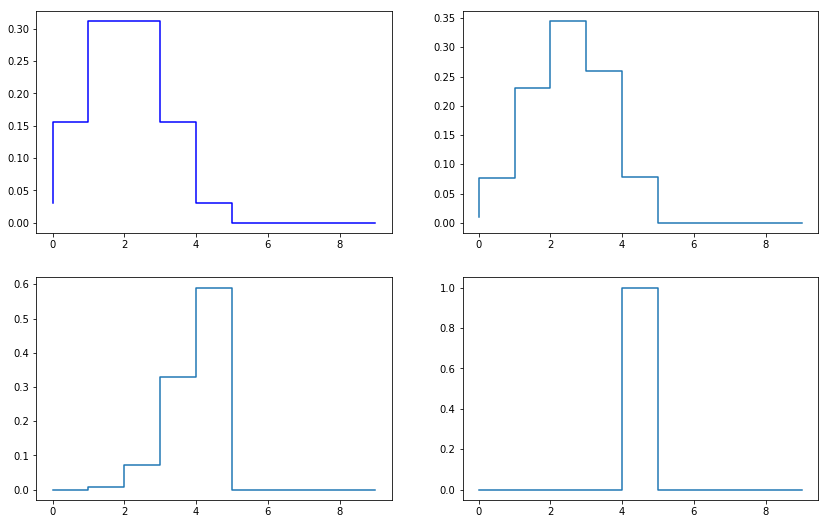

In [91]:
fig, ax = plt.subplots(2,2)
fig.set_size_inches(14,9)

#x = np.arange(binom.ppf(0.01, n, p), binom.ppf(0.99, n, p))
x = range(10)
#Plots with varying the p parameter
n, p = 5, 0.5
ax[0,0].step(x, binom.pmf(x, n, p), 'b', ms=8, label='binom pmf')
ax[0,1].step(x,binom.pmf(x, n, .6))
ax[1,0].step(x,binom.pmf(x, n, .9))
ax[1,1].step(x,binom.pmf(x, n, 1))
plt.show()

It appears that increasing the `p` parameter sort of makes the distribution more 'skinny'. It almost hones in on the center of the distribution. Lets see what `n` parameter accomplishes.

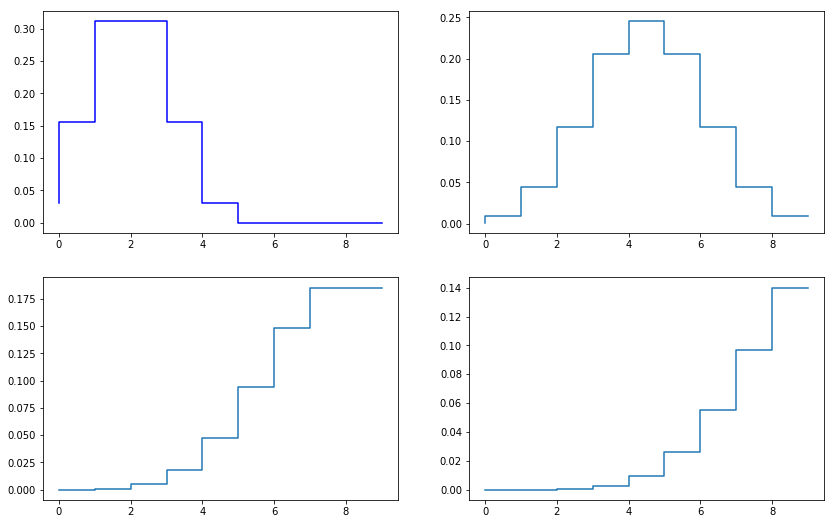

In [94]:
fig, ax = plt.subplots(2,2)
fig.set_size_inches(14,9)

#x = np.arange(binom.ppf(0.01, n, p), binom.ppf(0.99, n, p))
x = range(10)
#Plots with varying the n parameter
n, p = 5, 0.5
ax[0,0].step(x, binom.pmf(x, n, p), 'b', ms=8, label='binom pmf')
ax[0,1].step(x,binom.pmf(x, 10, p))
ax[1,0].step(x,binom.pmf(x,17, p))
ax[1,1].step(x,binom.pmf(x, 21, p))
plt.show()

The `n` parameter corresponds with the total number of steps.

The question we want to ask is that what is the probability that the background gives a data point that is as or *more* signal-like than **x**, and what sigma on a Gaussian corresponds to that value.

We can convert this to an integral and deduce the following: $$\int_{x}^{\infty}BN(x).$$
Let's say we fix `p = 0.4` and `n = 5`. This is equivalent to 1 - binom.cdf(x,n,p).

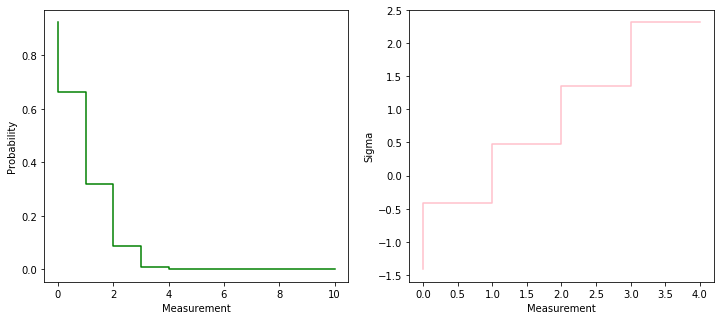

In [106]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(12,5)

x = range(11)
n, p = 5, 0.4

#plotting the cdf
ax[0].step(x,1-binom.cdf(x,n,p), color='green')
ax[0].set_xlabel('Measurement')
ax[0].set_ylabel('Probability')

#plotting sigma values
ax[1].step(x,norm.ppf(binom.cdf(x,n,p)), color='pink')
ax[1].set_xlabel('Measurement')
ax[1].set_ylabel('Sigma')

plt.show()

The probability signal-like events falls faster as we move towards the right on our measurement value. The sigma on the other hand increases almost linearly. The probabilities and sigmas are discrete because the distribution is discrete. As for implications for experiments, it would mean that we would be limited to tabular values rather than having continuous distributions.

The discrete distribution's parameters are not discrete which makes sense. The mean, for example, doesn't have to be an integer even if it extracted from integers.